# https://www.kaggle.com/c/poker-rule-induction

In [1]:
import math

import pandas as pd
import numpy as np
import statsmodels as stats

In [2]:
train = pd.read_csv('poker-hand-training-true.data', names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Type'])
test = pd.read_csv('poker-hand-testing.data', names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','Type'])

In [3]:
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Type
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [4]:
for column in train.columns:
    print(train[column].value_counts())

4    6312
2    6298
3    6250
1    6150
Name: S1, dtype: int64
1     1982
9     1967
7     1961
8     1948
2     1941
12    1940
11    1926
4     1919
13    1915
5     1892
3     1882
10    1877
6     1860
Name: C1, dtype: int64
1    6309
4    6300
2    6244
3    6157
Name: S2, dtype: int64
13    2007
1     1985
6     1956
12    1939
11    1931
10    1922
2     1921
7     1912
3     1912
4     1905
8     1898
9     1877
5     1845
Name: C2, dtype: int64
4    6419
1    6230
2    6208
3    6153
Name: S3, dtype: int64
10    2000
12    1987
3     1965
4     1935
7     1927
5     1920
11    1913
8     1912
13    1910
2     1910
1     1895
6     1884
9     1852
Name: C3, dtype: int64
3    6314
1    6269
2    6248
4    6179
Name: S4, dtype: int64
3     1999
2     1987
1     1983
11    1953
9     1946
7     1943
10    1924
6     1913
4     1902
5     1883
13    1874
8     1865
12    1838
Name: C4, dtype: int64
3    6314
1    6308
4    6216
2    6172
Name: S5, dtype: int64
8     1994
1     1970

<IPython.core.display.Javascript object>


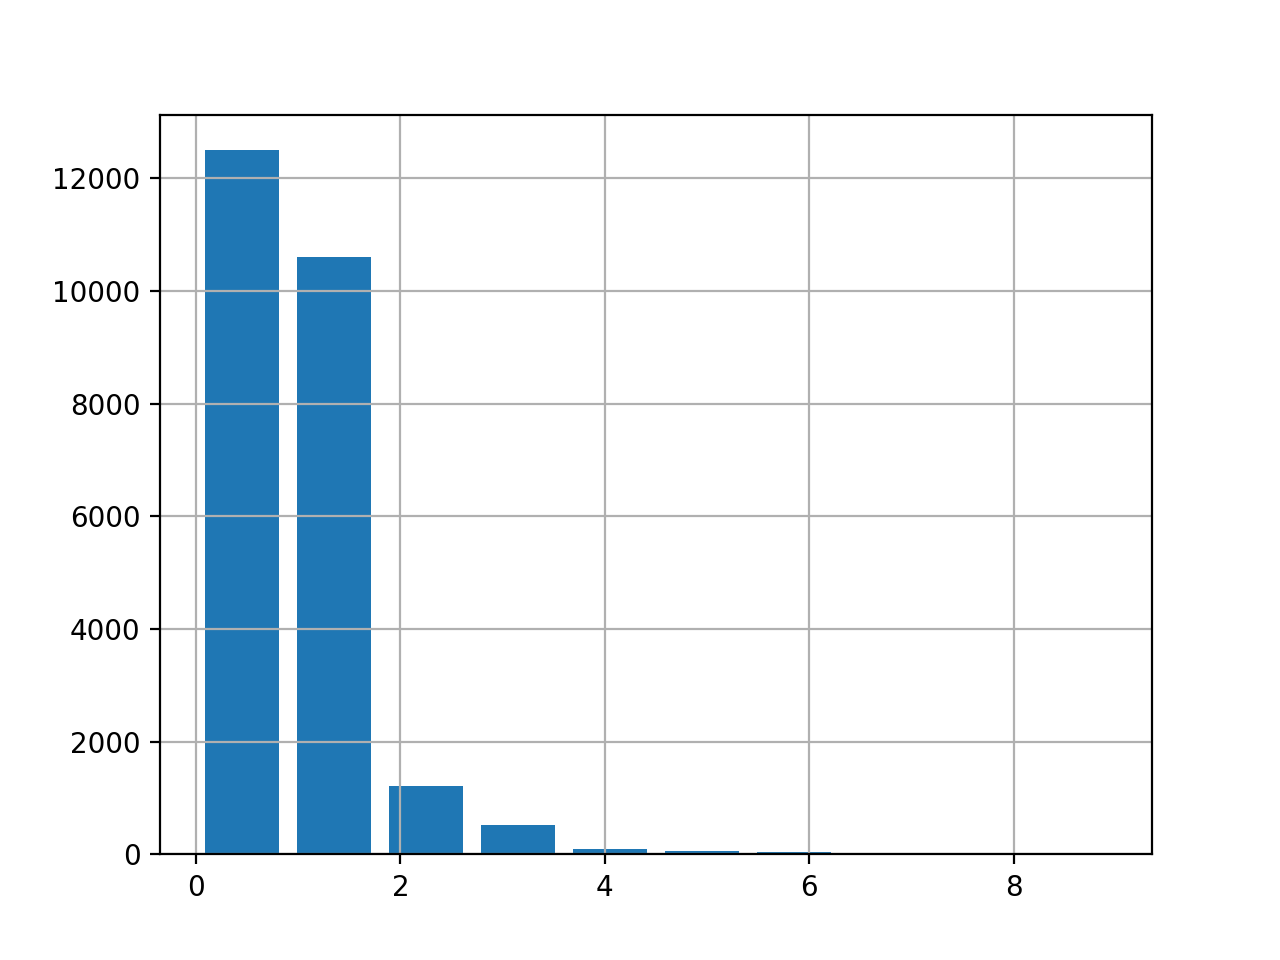

In [5]:
%matplotlib notebook
train.Type.hist(rwidth=0.8)

In [6]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']

for n in [5,10, 50]:
    clf = RandomForestClassifier(n_estimators=n)
    clf = clf.fit(X_train, y_train)
    print(n)
    print(classification_report(y_test,clf.predict(X_test)))
    print('=============')

5
             precision    recall  f1-score   support

          0       0.56      0.68      0.62    501209
          1       0.48      0.44      0.46    422498
          2       0.16      0.02      0.04     47622
          3       0.15      0.01      0.02     21121
          4       0.05      0.00      0.00      3885
          5       0.66      0.05      0.10      1996
          6       0.06      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.50      0.53      0.51   1000000

10


/Users/zhao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.58      0.74      0.65    501209
          1       0.51      0.43      0.47    422498
          2       0.20      0.02      0.03     47622
          3       0.20      0.01      0.01     21121
          4       0.18      0.00      0.00      3885
          5       0.42      0.00      0.01      1996
          6       0.00      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.52      0.56      0.53   1000000

50
             precision    recall  f1-score   support

          0       0.62      0.79      0.69    501209
          1       0.56      0.48      0.51    422498
          2       0.34      0.00      0.01     47622
          3       0.41      0.00      0.01     21121
          4       0.15      0.00      0.00      3885
          5       1.00      0.01      0

/Users/zhao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

In [9]:
X_test

,S1_Count,S2_Count,S3_Count,S4_Count,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,3,2,0,0,1,1,1,13,2,4,2,3,1,12
1,0,1,3,1,3,12,3,2,3,11,4,5,2,5
2,2,0,2,1,1,9,4,6,1,4,3,2,3,9
3,1,2,2,0,1,4,3,13,2,13,2,1,3,6
4,1,2,1,1,3,10,2,7,1,2,2,11,4,9
5,2,0,1,2,1,3,4,5,3,4,1,12,4,6
6,1,2,0,2,2,6,4,11,2,3,4,9,1,7
7,0,0,2,3,3,2,4,9,3,7,4,3,4,5
8,1,0,3,1,4,4,3,13,1,8,3,9,3,10
9,2,0,2,1,1,9,3,8,4,4,1,7,3,5


In [10]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.59      0.75      0.66    501209
          1       0.52      0.44      0.48    422498
          2       0.25      0.00      0.00     47622
          3       0.28      0.00      0.00     21121
          4       0.04      0.00      0.00      3885
          5       0.99      1.00      1.00      1996
          6       0.00      0.00      0.00      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       0.00      0.00      0.00         3

avg / total       0.54      0.57      0.54   1000000



In [11]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

In [12]:
X_test

,C1_Count,C2_Count,C3_Count,C4_Count,C5_Count,C6_Count,C7_Count,C8_Count,C9_Count,C10_Count,...,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,0,1,1,0,0,0,0,0,0,...,1,1,1,13,2,4,2,3,1,12
1,0,1,0,0,2,0,0,0,0,0,...,3,12,3,2,3,11,4,5,2,5
2,0,1,0,1,0,1,0,0,2,0,...,1,9,4,6,1,4,3,2,3,9
3,1,0,0,1,0,1,0,0,0,0,...,1,4,3,13,2,13,2,1,3,6
4,0,1,0,0,0,0,1,0,1,1,...,3,10,2,7,1,2,2,11,4,9
5,0,0,1,1,1,1,0,0,0,0,...,1,3,4,5,3,4,1,12,4,6
6,0,0,1,0,0,1,1,0,1,0,...,2,6,4,11,2,3,4,9,1,7
7,0,1,1,0,1,0,1,0,1,0,...,3,2,4,9,3,7,4,3,4,5
8,0,0,0,1,0,0,0,1,1,1,...,4,4,3,13,1,8,3,9,3,10
9,0,0,0,1,1,0,1,1,1,0,...,1,9,3,8,4,4,1,7,3,5


In [13]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    501209
          1       1.00      1.00      1.00    422498
          2       0.97      1.00      0.99     47622
          3       0.99      1.00      0.99     21121
          4       0.99      0.08      0.15      3885
          5       1.00      0.04      0.08      1996
          6       1.00      0.01      0.02      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       1.00      0.33      0.50         3

avg / total       0.99      0.99      0.99   1000000



/Users/zhao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
X_train[y_train == 4].iloc[6,:]

C1_Count     1
C2_Count     1
C3_Count     1
C4_Count     1
C5_Count     1
C6_Count     0
C7_Count     0
C8_Count     0
C9_Count     0
C10_Count    0
C11_Count    0
C12_Count    0
C13_Count    0
S1_Count     2
S2_Count     2
S3_Count     1
S4_Count     0
S1           1
C1           2
S2           3
C2           4
S3           2
C3           5
S4           1
C4           1
S5           2
C5           3
Name: 1279, dtype: int64

In [15]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    std = np.std(data_set[['C1', 'C2', 'C3' ,'C4', 'C5']], axis=1)
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

In [16]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       0.97      1.00      0.99     47622
          3       0.99      1.00      0.99     21121
          4       1.00      0.90      0.95      3885
          5       0.99      0.05      0.10      1996
          6       1.00      0.03      0.06      1424
          7       0.00      0.00      0.00       230
          8       0.00      0.00      0.00        12
          9       1.00      0.33      0.50         3

avg / total       1.00      1.00      0.99   1000000



/Users/zhao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
X_train[y_train == 7].iloc[1,:]

Card_Std      2.0
C1_Count      0.0
C2_Count      0.0
C3_Count      0.0
C4_Count      0.0
C5_Count      0.0
C6_Count      0.0
C7_Count      0.0
C8_Count      4.0
C9_Count      0.0
C10_Count     0.0
C11_Count     0.0
C12_Count     0.0
C13_Count     1.0
S1_Count      1.0
S2_Count      1.0
S3_Count      1.0
S4_Count      2.0
S1            2.0
C1            8.0
S2            4.0
C2            8.0
S3            3.0
C3            8.0
S4            1.0
C4            8.0
S5            4.0
C5           13.0
Name: 12538, dtype: float64

Feature ranking:
1. feature C4_Count (0.075125)
2. feature C7_Count (0.071408)
3. feature C11_Count (0.069946)
4. feature C5_Count (0.069091)
5. feature C6_Count (0.068951)
6. feature C9_Count (0.068160)
7. feature C12_Count (0.066900)
8. feature C2_Count (0.066560)
9. feature C3_Count (0.065934)
10. feature C13_Count (0.065051)
11. feature C10_Count (0.064458)
12. feature C8_Count (0.062874)
13. feature C1_Count (0.061462)
14. feature Card_Std (0.044780)
15. feature C5 (0.009206)
16. feature C4 (0.009039)
17. feature C3 (0.009032)
18. feature C1 (0.008708)
19. feature C2 (0.008704)
20. feature S4_Count (0.004732)
21. feature S3_Count (0.004427)
22. feature S1_Count (0.004210)
23. feature S2_Count (0.004167)
24. feature S3 (0.003532)
25. feature S2 (0.003453)
26. feature S4 (0.003395)
27. feature S5 (0.003391)
28. feature S1 (0.003304)


<IPython.core.display.Javascript object>


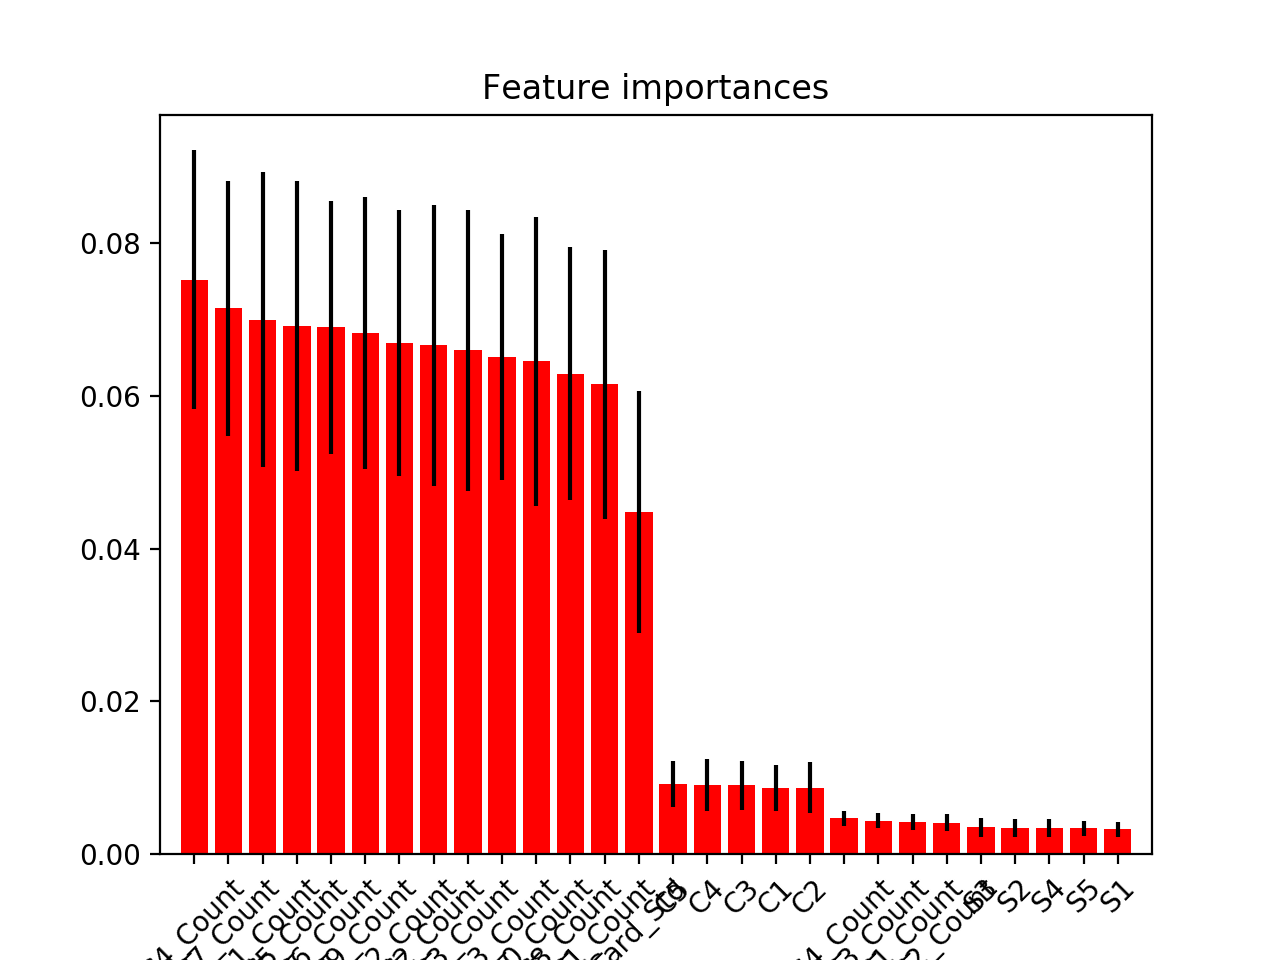

In [18]:
import matplotlib.pyplot as plt
def feature_importance(forest):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X_train.shape[1]):
        print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=45)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

feature_importance(clf)

In [19]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    std = np.std(data_set[['C1', 'C2', 'C3' ,'C4', 'C5']], axis=1)
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

X_train = X_train.drop(['S1' ,'S2', 'S3', 'S4','S5'], axis=1)
X_test = X_test.drop(['S1' ,'S2', 'S3', 'S4','S5'], axis=1)

In [20]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       0.97      1.00      0.99     47622
          3       0.99      1.00      0.99     21121
          4       1.00      0.91      0.95      3885
          5       1.00      0.01      0.01      1996
          6       1.00      0.05      0.10      1424
          7       0.50      0.00      0.01       230
          8       0.00      0.00      0.00        12
          9       1.00      0.67      0.80         3

avg / total       1.00      1.00      0.99   1000000



/Users/zhao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    std = np.std(data_set[['C1', 'C2', 'C3' ,'C4', 'C5']], axis=1)
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

X_train.drop(['S1','S2', 'S3', 'S4','S5'], axis=1)
X_test.drop(['S1','S2', 'S3', 'S4','S5'], axis=1)

In [ ]:
X_train[y_train == 5].iloc[1,:]

In [ ]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    std = np.std(data_set[['C1', 'C2', 'C3' ,'C4', 'C5']], axis=1)
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

X_train = X_train.drop(['S1','S2', 'S3', 'S4','S5'], axis=1)
X_test = X_test.drop(['S1','S2', 'S3', 'S4','S5'], axis=1)

def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 5):
        each_counts = pd.concat([data_set.S1_Count == i, data_set.S2_Count == i, data_set.S3_Count == i, data_set.S4_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_value_count(X_train)
X_test = concat_suit_value_count(X_test)

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

In [ ]:
X_train[y_train == 6].iloc[5,:]

In [21]:
X_train, y_train = train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], train['Type']
X_test, y_test = test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']], test['Type']
def concat_suit_count(data_set):
    suit_counts = []
    for i in range(1, 5):
        each_counts = pd.concat([data_set.S1 == i, data_set.S2 == i, data_set.S3 == i, data_set.S4 == i, data_set.S5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['S{}_Count'.format(i) for i in range(1,5)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_suit_count(X_train)
X_test = concat_suit_count(X_test)

def concat_card_count(data_set):
    suit_counts = []
    for i in range(1, 14):
        each_counts = pd.concat([data_set.C1 == i, data_set.C2 == i, data_set.C3 == i, data_set.C4 == i,data_set.C5 == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['C{}_Count'.format(i) for i in range(1,14)])
    return pd.concat([suit_counts_df, data_set], axis=1)
X_train = concat_card_count(X_train)
X_test = concat_card_count(X_test)

def concat_card_std(data_set):
    std = np.std(data_set[['C1', 'C2', 'C3' ,'C4', 'C5']], axis=1)
    std_df = pd.DataFrame(std, columns=['Card_Std'])
    return pd.concat([std_df, data_set], axis=1)

X_train = concat_card_std(X_train)
X_test = concat_card_std(X_test)

X_train = X_train.drop(['S1','S2', 'S3', 'S4','S5'], axis=1)
X_test = X_test.drop(['S1','S2', 'S3', 'S4','S5'], axis=1)

def concat_suit_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.S1_Count == i, data_set.S2_Count == i, data_set.S3_Count == i, data_set.S4_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Suit_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_suit_value_count(X_train)
X_test = concat_suit_value_count(X_test)

def concat_hand_value_count(data_set):
    suit_counts = []
    for i in range(0, 6):
        each_counts = pd.concat([data_set.C1_Count == i, data_set.C2_Count == i, 
                                 data_set.C3_Count == i, data_set.C4_Count == i,
                                 data_set.C5_Count == i, data_set.C6_Count == i,
                                 data_set.C7_Count == i, data_set.C8_Count == i,
                                 data_set.C9_Count == i, data_set.C10_Count == i,
                                 data_set.C11_Count == i, data_set.C12_Count == i,
                                 data_set.C13_Count == i], axis=1)
        suit_counts.append(np.sum(each_counts, axis=1))
    suit_counts = np.vstack(suit_counts)
    suit_counts_df = pd.DataFrame(suit_counts.transpose(), columns=['Card_Value_Count_{}'.format(i) for i in range(0,6)])
    return pd.concat([suit_counts_df, data_set], axis=1)

X_train = concat_hand_value_count(X_train)
X_test = concat_hand_value_count(X_test)

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    501209
          1       1.00      1.00      1.00    422498
          2       1.00      1.00      1.00     47622
          3       1.00      1.00      1.00     21121
          4       1.00      0.90      0.95      3885
          5       0.99      1.00      1.00      1996
          6       1.00      1.00      1.00      1424
          7       1.00      1.00      1.00       230
          8       0.00      0.00      0.00        12
          9       0.50      0.33      0.40         3

avg / total       1.00      1.00      1.00   1000000



/Users/zhao/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf.predict(X_test)))

[[501209      0      0      0      0      0      0      0      0      0]
 [     0 422498      0      0      0      0      0      0      0      0]
 [     0      0  47622      0      0      0      0      0      0      0]
 [     0      0      0  21121      0      0      0      0      0      0]
 [   375      0      0      0   3510      0      0      0      0      0]
 [     0      0      0      0      0   1995      0      0      0      1]
 [     0      0      0      0      0      0   1424      0      0      0]
 [     0      0      0      0      0      0      0    230      0      0]
 [     0      0      0      0      0     12      0      0      0      0]
 [     0      0      0      0      0      2      0      0      0      1]]


Feature ranking:
1. feature Card_Value_Count_0 (0.342593)
2. feature Card_Value_Count_1 (0.313870)
3. feature Card_Value_Count_2 (0.237684)
4. feature Card_Value_Count_3 (0.024418)
5. feature Card_Std (0.011510)
6. feature C10_Count (0.007956)
7. feature C1_Count (0.007079)
8. feature C5_Count (0.006538)
9. feature C8_Count (0.005425)
10. feature C9_Count (0.004790)
11. feature C7_Count (0.004734)
12. feature C4_Count (0.003511)
13. feature C13_Count (0.003422)
14. feature C2_Count (0.003348)
15. feature C11_Count (0.003313)
16. feature C3_Count (0.003259)
17. feature Suit_Value_Count_5 (0.002969)
18. feature C12_Count (0.002905)
19. feature Suit_Value_Count_0 (0.002768)
20. feature C6_Count (0.002506)
21. feature S4_Count (0.000662)
22. feature S1_Count (0.000594)
23. feature Suit_Value_Count_1 (0.000562)
24. feature C5 (0.000493)
25. feature C4 (0.000443)
26. feature C2 (0.000442)
27. feature C3 (0.000432)
28. feature C1 (0.000424)
29. feature S3_Count (0.000414)
30. feature Suit_Val

<IPython.core.display.Javascript object>


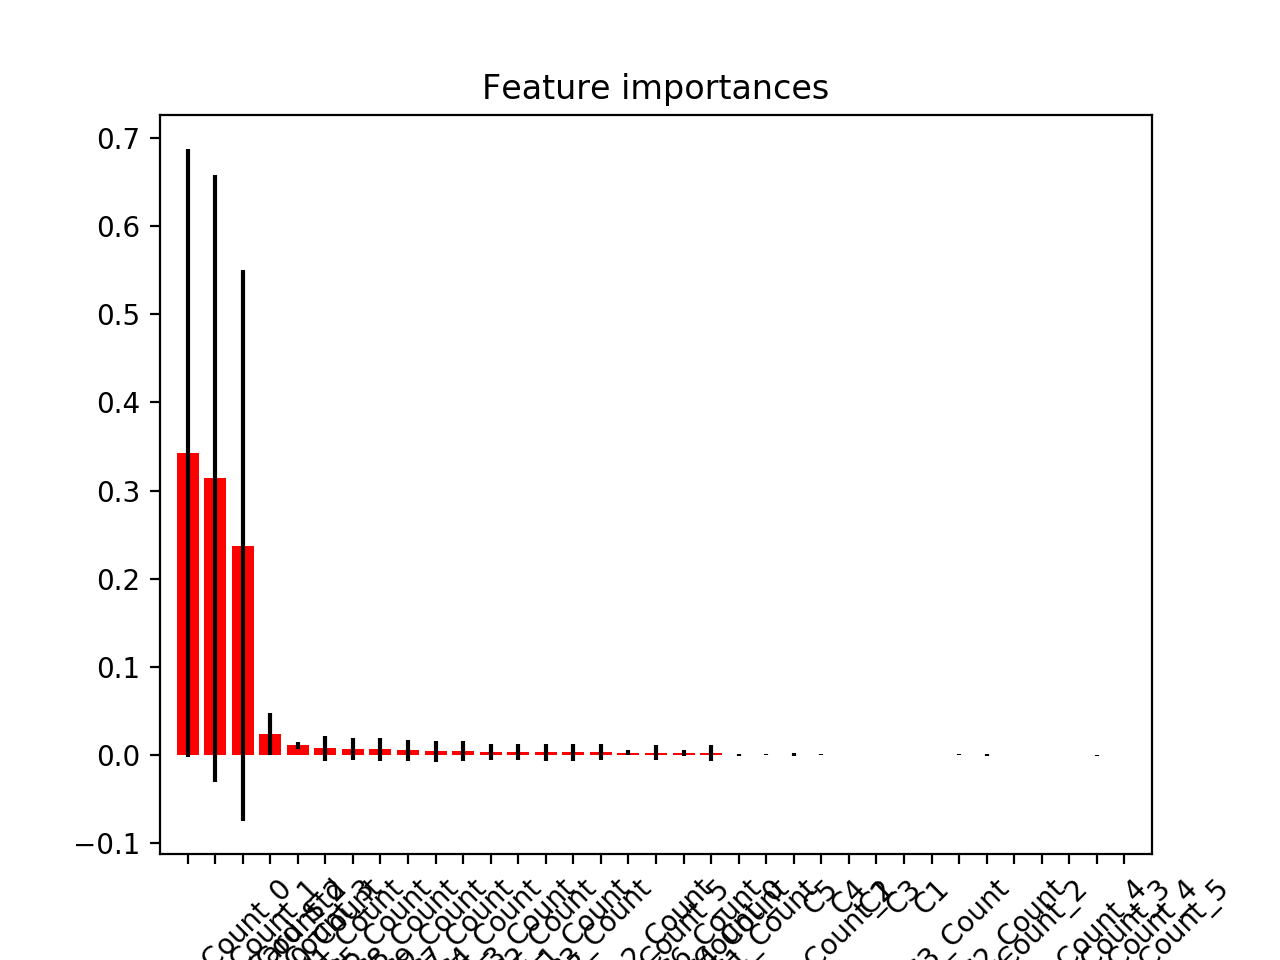

In [23]:
feature_importance(clf)